In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

df = pd.DataFrame(np.random.randn(10, 4).cumsum(0), columns=['A', 'B', 'C', 'D'], index=np.arange(0, 100, 10))
df

,A,B,C,D
0,0.968991,-0.293947,-0.539234,0.826026
10,0.286867,0.231561,0.192478,1.615318
20,0.988118,-0.661635,-1.242088,0.800736
30,0.383270,-1.619227,-2.585905,1.760133
40,0.492791,-1.047192,-2.351263,2.101301
50,0.011622,-2.355309,-2.865316,1.687779
60,-0.327720,-2.363998,-3.723086,2.539104
70,-1.286115,-1.418216,-3.928770,2.943812
80,-1.309102,-1.501035,-3.518633,4.140183
90,0.236957,-1.349345,-3.021749,3.577948


<AxesSubplot:>

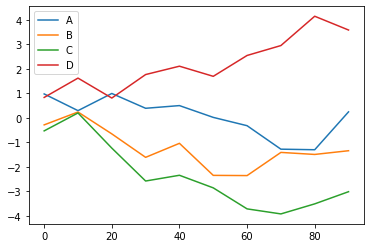

In [2]:
df.plot()

In [3]:
Data = {'country':['USA', 'Australia', 'Canada', 'Australia', 'USA', 'USA', 'Canada', 'Australia', 'Canada'], 'year':[2015, 2016, 1994, 1995, 2002, 1995, 2008, 2005, 2015], 'unemployment':[6.4, 7.3, 8.2, 4.1, 6.6, 5.6, 5.2, 5.6, 5]}
df2 =pd.DataFrame(Data)


df2

,country,year,unemployment
0,USA,2015,6.4
1,Australia,2016,7.3
2,Canada,1994,8.2
3,Australia,1995,4.1
4,USA,2002,6.6
5,USA,1995,5.6
6,Canada,2008,5.2
7,Australia,2005,5.6
8,Canada,2015,5.0


<AxesSubplot:>

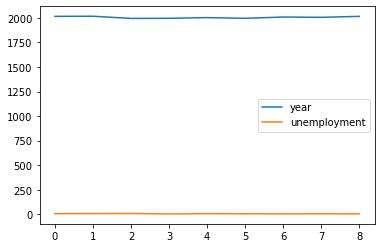

In [4]:
df2.plot()

<AxesSubplot:ylabel='country'>

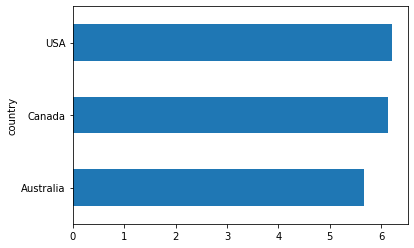

In [6]:
df2.groupby("country")['unemployment'].mean().plot(kind='barh')

<AxesSubplot:xlabel='year'>

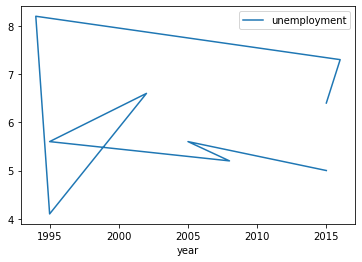

In [7]:
df2.plot(x='year', y='unemployment')

country
Australia    AxesSubplot(0.125,0.125;0.775x0.755)
Canada       AxesSubplot(0.125,0.125;0.775x0.755)
USA          AxesSubplot(0.125,0.125;0.775x0.755)
dtype: object

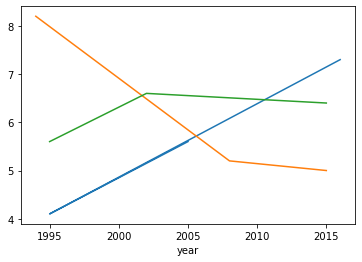

In [8]:

fig, ax = plt.subplots()
df2.groupby('country').plot(x='year', y='unemployment', ax=ax, legend= False)


In [9]:
df4 = pd.read_csv('cve.csv')
df4.head()

,Unnamed: 0,mod_date,pub_date,cvss,cwe_code,cwe_name,Unnamed: 6
0,CVE-2019-16548,21/11/2019 15:15,21/11/2019 15:15,6.8,352,Cross-Site Request Forgery (CSRF),NaN
1,CVE-2019-16547,21/11/2019 15:15,21/11/2019 15:15,4.0,732,Incorrect Permission Assignment for Critical ...,NaN
2,CVE-2019-16546,21/11/2019 15:15,21/11/2019 15:15,4.3,639,Authorization Bypass Through User-Controlled Key,NaN
3,CVE-2013-2092,20/11/2019 21:22,20/11/2019 21:15,4.3,79,Improper Neutralization of Input During Web P...,NaN
4,CVE-2013-2091,20/11/2019 20:15,20/11/2019 20:15,7.5,89,Improper Neutralization of Special Elements u...,NaN


In [10]:
df4.dropna(axis='columns', how='all')

,Unnamed: 0,mod_date,pub_date,cvss,cwe_code,cwe_name
0,CVE-2019-16548,21/11/2019 15:15,21/11/2019 15:15,6.8,352,Cross-Site Request Forgery (CSRF)
1,CVE-2019-16547,21/11/2019 15:15,21/11/2019 15:15,4.0,732,Incorrect Permission Assignment for Critical ...
2,CVE-2019-16546,21/11/2019 15:15,21/11/2019 15:15,4.3,639,Authorization Bypass Through User-Controlled Key
3,CVE-2013-2092,20/11/2019 21:22,20/11/2019 21:15,4.3,79,Improper Neutralization of Input During Web P...
4,CVE-2013-2091,20/11/2019 20:15,20/11/2019 20:15,7.5,89,Improper Neutralization of Special Elements u...
...,...,...,...,...,...,...
89655,CVE-2007-6444,10/01/2008 5:00,19/12/2007 22:46,5.0,20,Improper Input Validation
89656,CVE-2007-6443,10/01/2008 5:00,19/12/2007 22:46,5.0,119,Improper Restriction of Operations within the...
89657,CVE-2007-6442,10/01/2008 5:00,19/12/2007 22:46,5.0,119,Improper Restriction of Operations within the...
89658,CVE-2007-6370,10/01/2008 5:00,15/12/2007 1:46,5.0,119,Improper Restriction of Operations within the...


In [11]:
df4['pub_date'] = pd.to_datetime(df4['pub_date'])
df4.rename(columns = {'Unnamed: 0':'CVE'}, inplace=True)
df4['CVE-Year'] = df4['pub_date'].apply(lambda x: x.strftime('%Y')) 
Our_grouped_CVEs= df4.groupby('CVE-Year') ['CVE'].count()
Our_grouped_CVEs

CVE-Year
1999       46
2000       18
2001       34
2002      217
2003      245
2004      147
2005      356
2006      864
2007     2435
2008     4991
2009     4909
2010     3755
2011     3396
2012     4135
2013     4125
2014     6825
2015     5217
2016     5325
2017    12965
2018    14855
2019    14800
Name: CVE, dtype: int64

<AxesSubplot:xlabel='CVE-Year'>

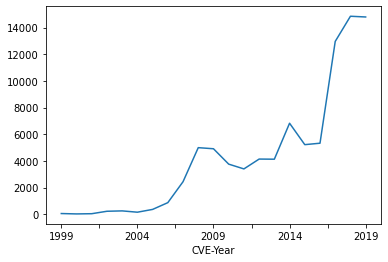

In [12]:
Our_grouped_CVEs.plot()

<AxesSubplot:xlabel='cvss'>

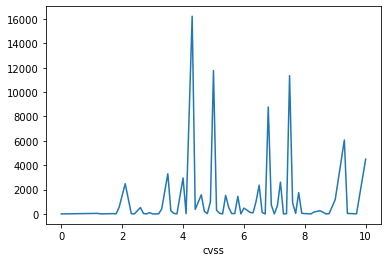

In [13]:
df4.groupby("cvss")['CVE'].count().plot()